# tutorial for srfpython

In [1]:
from srfpython import *

## I/ create a 1-D depth model

In [2]:
# create 1-D depth model
ztop = [0.00, 0.25, 0.45, 0.65, 0.85, 1.05, 1.53, 1.80] #km, top layer depth
vp   = [1.85, 2.36, 2.63, 3.15, 3.71, 4.54, 5.48, 5.80] #km/s
vs   = [0.86, 1.10, 1.24, 1.47, 1.73, 2.13, 3.13, 3.31] #km/s
rh   = [2.47, 2.47, 2.47, 2.47, 2.47, 2.58, 2.58, 2.63] #g/cm3

dm = depthmodel_from_arrays(ztop, vp, vs, rh)
print dm #__str__ returns the file content at mod96 format, see Herrmann doc (CPS), see also dm.write96

MODEL.01
ISOTROPIC
KGS
FLAT EARTH
1-D
CONSTANT VELOCITY
LINE08
LINE09
LINE10
LINE11
H(KM) VP(KM/S) VS(KM/S) RHO(GM/CC) QP QS ETAP ETAS FREFP FREFS
0.250000 1.850000 0.860000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.200000 2.360000 1.100000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.200000 2.630000 1.240000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.200000 3.150000 1.470000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.200000 3.710000 1.730000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.480000 4.540000 2.130000 2.580000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.270000 5.480000 3.130000 2.580000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.000000 5.800000 3.310000 2.630000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000



In [3]:
#write it as a file
dm.write96('dmtuto.mod96')

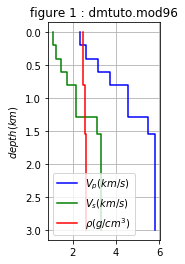

In [25]:
# display
plt.figure(figsize=(2, 4))
dm.show(gca())
gca().set_title('figure 1 : dmtuto.mod96')
gca().grid(True)
plt.legend();

## II/ compute dispersion curves 

### II.1/ use in a python program

In [5]:
print help(dispersion_2)

Help on function dispersion_2 in module srfpython.Herrmann.Herrmann:

dispersion_2(ztop, vp, vs, rh, Curves, h=0.005, dcl=0.005, dcr=0.005, keepnans=False)
    same as dispersion with slightly more convenient inputs and outputs
    (inputs are grouped by dispersion curves)
    
    input:
        -> depth model
        ztop, vp, vs, rh = depth model, 4 iterables with same length
    
        -> dispersion curves
        Curves = list of tuples like (wave(str,"R"/"L"), type(str,"C"/"U"), mode(int), frequency(array,Hz))
        example :
            Curves = [('L', 'C', 0, fLC0),
                      ('L', 'C', 1, fLC1),
                      ('R', 'U', 0, fRU0)]
    
        -> Herrmann's parameters, see dispersion
    
    output :
        see dispersion_1
    
    see also :
        dispersion
        dispersion_1
        groupbywtm
        igroupbywtm

None


elapsed time dispersion : 0.080908s


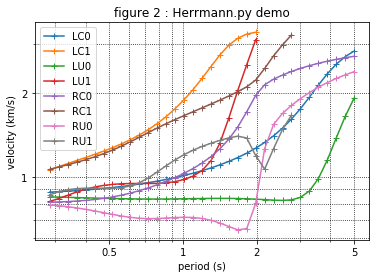

In [6]:
# define the dipsersion curves to compute
#          Wave(R/L) Type(C/U) Mode    Frequency array (Hz)             
Curves = [('R',      'U',      0,      freqspace(0.2, 3.5, 35, "log")), 
          ('R',      'U',      1,      freqspace(0.2, 3.5, 35, "log")), 
          ('R',      'C',      0,      freqspace(0.2, 3.5, 35, "log")), 
          ('R',      'C',      1,      freqspace(0.2, 3.5, 35, "log")), 
          ('L',      'U',      0,      freqspace(0.2, 3.5, 35, "log")), 
          ('L',      'U',      1,      freqspace(0.2, 3.5, 35, "log")), 
          ('L',      'C',      0,      freqspace(0.2, 3.5, 35, "log")), 
          ('L',      'C',      1,      freqspace(0.2, 3.5, 35, "log"))] 

# compute dispersion curves
with Timer('dispersion'):
    out = list(dispersion_2(ztop, vp, vs, rh, Curves))

# display results
ax = plt.gca()
for w, t, m, fs, us in out:
    ax.loglog(1. / fs, us, '+-', label = "%s%s%d" % (w, t, m))
ax.set_xlabel('period (s)')
ax.set_ylabel('velocity (km/s)')    
ax.grid(True, which = "major")
ax.grid(True, which = "minor")
logtick(ax, "xy")
ax.set_title('figure 2 : Herrmann.py demo')

plt.legend()
plt.show()

### II.2/ use in command line 

In [11]:
# compute dispersion curves, and save as surf96 file
import os
os.system('rm -f dmtuto*.surf96')
%run -i ../bin/m96 --disp dmtuto.mod96 \
    -LC0 .1 10 30 plog \
    -RC1 .1 10 30 plog \
    -RU0 .1 10 30 plog \
    -save dmtuto.surf96


dmtuto.mod96 => dmtuto.surf96


dmtuto.surf96
    Claw wave=L mode=0 type=C flag=T extrapmode=0 N=30
    Claw wave=R mode=1 type=C flag=T extrapmode=1 N=19
    Ulaw wave=R mode=0 type=U flag=T extrapmode=0 N=30


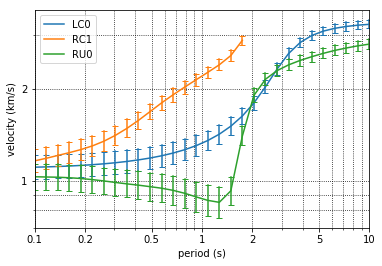

In [12]:
# display output
%run -i ../bin/s96 --show dmtuto.surf96 -inline

see also programs s96 and m96 that provide more manipulation tools  
for depth models and surface wave dispersion curves

In [13]:
%run -i ../bin/m96 --help

m96
--show            list of mod96 files to display (same plot)
--disp            name of mod96 file to use as input
    -RU0          rayleigh, group, mode 0 : expects 4 frequency arguments : fstart, fend, nfreq, fscale
    -RU1          rayleigh, group, mode 1 : expects 4 frequency arguments : fstart, fend, nfreq, fscale
    -RC0          rayleigh, phase, mode 0 : expects 4 frequency arguments : fstart, fend, nfreq, fscale          
    -LC0          love,     phase, mode 0 : expects 4 frequency arguments : fstart, fend, nfreq, fscale
    ...
    -save         name of surf96file to write
--split 
    -thck         thickness of the sublayers in km
    -sfx          suffix to add before file extension (default split)
    -o            ignore suffix and overwrite input file
--addlayer 
    -thck         thickness of the sublayers in km
    -sfx          suffix to add before file extension (default split)
    -o            ignore suffix and overwrite input file    
-inline           rep

In [14]:
%run -i ../bin/s96 --help

s96
--show            list of surf96files to display
    -freq         plot in frequency domain if specified
--resamp          list of surf96files to resample
    -fspace       new frequency array in Hz, fstart, fend, nfreq, fscale
    -sfx          file suffix to append, use "" to overwrite input files
-inline             replace showme by plt.show (e.g. for jupyter)
#surf96 format 
SURF96 {wave} {type} {flag} {mode} {period(s)} {value(km/s)} {dvalue(km/s)}



## III/ depth inversion

### III.1/ Program HerrMet

In [15]:
%run -i ../bin/HerrMet --help

HerrMet V5
# ----------------------------------------------------
-w           i       set the number of virtual workers to use for all parallelized
                     processes, default 4
-taskset     s       change job affinity for all parallelized processes, 
                     default 0-3
-agg                 use agg backend (no display) if mentioned
-lowprio             run processes with low priority if mentioned
-inline              replace showme by plt.show (e.g. jupyter)
# ----------------------------------------------------
--help, -h           display this help message, and quit
--example, -ex       display an example of script, and quit
--param      i f     generate a template parameter file to custom, need the number of layers 
                     and bottom depth in km
    -basedon s       build parametrization based on an existing mod96 file, require a filename, 
                     if not specified, I take fixed values to build the parameter file
    -t       s  

In [16]:
%run -i ../bin/HerrMet -ex


# -------------
# Example usage of HerrMet V5
# -------------

# 1/ Data
# get the target dispersion curves, resample it between 0.2-1.5 Hz 
# with 15 samples spaced logarithmically in period domain
# adjust uncertainties to 0.1 in logaritmic domain, 
# overwrite target if exists (_HerrMet.target) 
# and display it
HerrMet --target /path/to/my/data/file.surf96 \
            -resamp 0.2 1.5 15 plog \
            -lunc 0.1 \
            -ot \
            --disp

# >> you may edit _HerrMet.target and remove points that 
#    do not need to be inverted, check with  
HerrMet --disp

# 2/ Parameterization
# build parameter file from existing depthmodel,
# use 7 layers, use parametrization mZVSPRRH, 
# require vp, vs and density to be growing
# overwrite paramfile if exists (_HerrMet.param) and display
HerrMet --param 7 3. \
            -basedon /path/to/my/depthmodel.mod96 \
            -t  mZVSPRRH \
            -growing \
            -op \
            --disp

# >> now edit _HerrMet.param 

### III.2/ Application

we propose to invert the synthetic data generated in section I (dmtuto.surf96) and compare the inversion result to the actual model used to synthetize the data (i.e. dmtuto.mod96)

In [17]:
assert os.path.exists("./dmtuto.surf96")

#### III.2.1/ Target data

please only datapoints to invert in _HerrMet.target
use option --disp to see the target data
_HerrMet.target
    Claw wave=L mode=0 type=C flag=T extrapmode=0 N=7
    Claw wave=R mode=1 type=C flag=T extrapmode=1 N=3
    Ulaw wave=R mode=0 type=U flag=T extrapmode=0 N=7


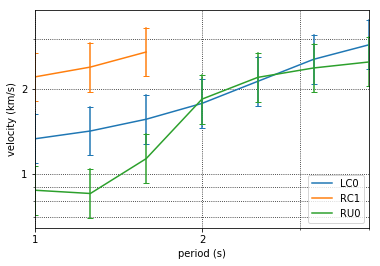

In [13]:
# get the target dispersion curves, resample it between 0.25-1 Hz 
# with 7 samples spaced logarithmically in period domain
# adjust uncertainties to 0.2*velocity (i.e. constant uncertainty in logaritmic domain), 
# overwrite target if exists (_HerrMet.target) 
%run -i ../bin/HerrMet --target dmtuto.surf96 \
            -resamp 0.25 1.0 7 plog \
            -lunc 0.2 \
            -ot
%run -i ../bin/s96 --show _HerrMet.target -inline
#or ./bin/HerrMet --target dmtuto.surf96

#### III.2.2/ Parameterization

#met DRHMIN = 0.0
#met DPRMAX = 0.0
#met DVPMIN = 0.0
#met DRHMAX = 5.0
#met DVPMAX = 5.0
#met DVSMAX = 5.0
#met DPRMIN = -5.0
#met PRIORTYPE = 'DVPDVSDRHDPR'
#met NLAYER = 4
#met TYPE = 'mZVSPRRH'
#met DVSMIN = 0.0
#fld KEY VINF VSUP
#unt - - -
#fmt %5s %16f %16f
       -Z1        -0.217990        -0.217990
       -Z2        -0.895334        -0.895334
       -Z3        -3.000000        -3.000000
       VS0         1.111553         1.111553
       VS1         1.577859         1.577859
       VS2         3.071242         3.071242
       VS3         3.310000         3.310000
       PR0         2.143200         2.143200
       PR1         2.136603         2.136603
       PR2         1.800138         1.800138
       PR3         1.752266         1.752266
       RH0         2.470000         2.470000
       RH1         2.485482         2.485482
       RH2         2.614447         2.614447
       RH3         2.630000         2.630000

please customize _HerrMet.param, do not change line orders 

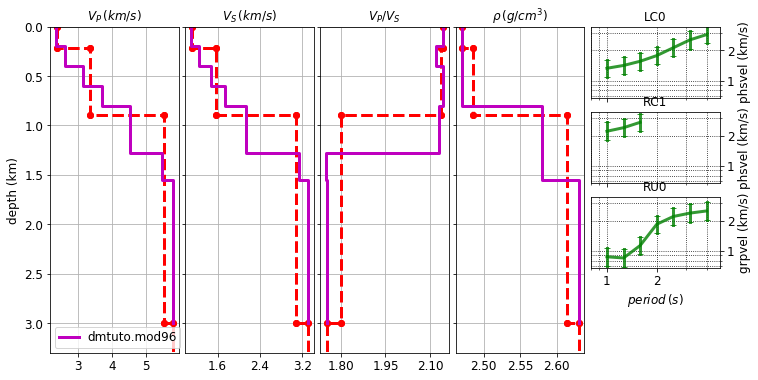

In [14]:
# build the parameter file from an existing depthmodel (dmtuto.mod96),
# use 4 layers down to 3 km, 
# use parametrization mode mZVSPRRH (means top depth, VS, VP/VS and density in each layer)
# require vp, vs and density to be growing
# overwrite paramfile if exists (_HerrMet.param) and display
%run -i ../bin/HerrMet --param 4 3. \
            -basedon dmtuto.mod96 -m96 dmtuto.mod96 \
            -t  mZVSPRRH \
            -growing \
            -op --disp -inline

> red dashed curves = prior boundaries  
> green duspersion curves = target data  
> purple model = actual model used to generate the synthetic data  

> Note that at this step, the boundaries for each parameter (red dashed curves)   
> are the same (because VINF=VSUP in _HerrMet.param) : i.e. all parameters are locked  
> one need to adjust the VINF, VSUP boundaries for all parameters to invert  
>
> you may do it manually (edit _HerrMet.param),   
> here I do it with programming tools for tutorial

In [15]:
#load the parameter file, find lines related to top depth and to VS
from tetedenoeud import AsciiFile
A = AsciiFile('_HerrMet.param')

IZ  = np.asarray(["Z"  in _ for _ in A['KEY']], bool) #lines corresponding to Z parameters
IVS = np.asarray(["VS" in _ for _ in A['KEY']], bool) #lines corresponding to VS parameters
IPR = np.asarray(["PR" in _ for _ in A['KEY']], bool) #lines corresponding to VP/VS parameters

In [16]:
#change parameter boundaries (decrease VINF and increase VSUP), overwrite _HerrMet.param
A['VINF'][IVS] = [0.55, 0.78, 1.53, 1.65]
A['VSUP'][IVS] = [2.22, 3.15, 4.00, 4.00]
A['VINF'][IZ]  = [-.31, -1.5, -3.1]
A['VSUP'][IZ]  = [-.11, -.79, -2.9]
print A
A.write('_HerrMet.param')

#met DRHMIN = 0.0
#met DPRMAX = 0.0
#met DVPMIN = 0.0
#met DRHMAX = 5.0
#met DVPMAX = 5.0
#met DVSMAX = 5.0
#met DPRMIN = -5.0
#met PRIORTYPE = 'DVPDVSDRHDPR'
#met NLAYER = 4
#met TYPE = 'mZVSPRRH'
#met DVSMIN = 0.0
#fld KEY VINF VSUP
#unt - - -
#fmt %5s %16f %16f
       -Z1        -0.310000        -0.110000
       -Z2        -1.500000        -0.790000
       -Z3        -3.100000        -2.900000
       VS0         0.550000         2.220000
       VS1         0.780000         3.150000
       VS2         1.530000         4.000000
       VS3         1.650000         4.000000
       PR0         2.143200         2.143200
       PR1         2.136603         2.136603
       PR2         1.800138         1.800138
       PR3         1.752266         1.752266
       RH0         2.470000         2.470000
       RH1         2.485482         2.485482
       RH2         2.614447         2.614447
       RH3         2.630000         2.630000



call option --run to start inversion
parameter type :  Parameterizer_mZVSPRRH
prior type     :  LogRhoM_DVPDVSDRHDPR


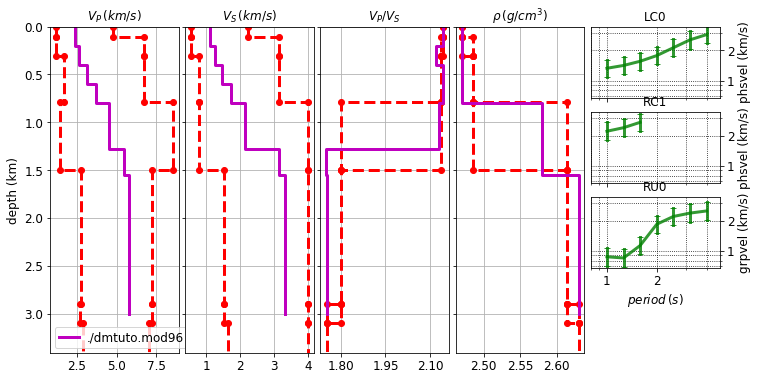

In [17]:
#display the parameterization
#note that the boundaries now allow VS and Zop to vary between the red dashed lines
%run -i ../bin/HerrMet --disp -inline -m96 ./dmtuto.mod96

#### III.2.3/ Run inversion

In [18]:
#run inversion with 4 metropolis chains, keep 1000 models per chain
%run -i ../bin/HerrMet -w 4 -taskset "0-3" \
        --run restart -nchain 4 -nkeep 1000 

parameter type :  Parameterizer_mZVSPRRH
prior type     :  LogRhoM_DVPDVSDRHDPR
chainid     2 ntest   100 nfail    39 nkept     2 nstay    40 IK  0.00 AK  0.02 MP 0.49 AS 110.19/s IS  80.31/s LI -7275.965355
chainid     0 ntest   100 nfail    10 nkept     4 nstay    18 IK  0.00 AK  0.04 MP 0.52 AS  70.04/s IS  61.50/s LI -95.002706
chainid     3 ntest   100 nfail     6 nkept     2 nstay     6 IK  0.10 AK  0.02 MP 0.49 AS  70.33/s IS  62.84/s LI -42.219283
chainid     1 ntest   100 nfail     5 nkept     5 nstay    41 IK  0.00 AK  0.05 MP 0.54 AS  68.73/s IS  61.48/s LI -6536.087008
chainid     2 ntest   200 nfail    42 nkept    23 nstay     0 IK  0.40 AK  0.12 MP 0.43 AS  84.02/s IS  70.55/s LI -9.034718
chainid     3 ntest   200 nfail     6 nkept    38 nstay     0 IK  0.50 AK  0.19 MP 0.67 AS  67.20/s IS  65.13/s LI -14.464651
chainid     0 ntest   200 nfail    10 nkept    16 nstay    20 IK  0.00 AK  0.08 MP 0.35 AS  66.66/s IS  69.05/s LI -1.153567
chainid     1 ntest   200 nfail     

chainid     0 ntest  1700 nfail    10 nkept   421 nstay     0 IK  0.50 AK  0.25 MP 0.70 AS  59.43/s IS  70.15/s LI -3.473743
chainid     3 ntest  1700 nfail     7 nkept   405 nstay     8 IK  0.10 AK  0.24 MP 0.45 AS  58.97/s IS  59.67/s LI -1.095878
chainid     1 ntest  1700 nfail     5 nkept   405 nstay    35 IK  0.00 AK  0.24 MP 0.44 AS  58.90/s IS  61.43/s LI -2.182319
chainid     2 ntest  1800 nfail    43 nkept   432 nstay     7 IK  0.20 AK  0.24 MP 0.46 AS  61.19/s IS  62.01/s LI -2.188065
chainid     0 ntest  1800 nfail    10 nkept   443 nstay     1 IK  0.30 AK  0.25 MP 0.63 AS  59.58/s IS  57.87/s LI -0.781581
chainid     3 ntest  1800 nfail     7 nkept   429 nstay     2 IK  0.50 AK  0.24 MP 0.43 AS  59.09/s IS  66.20/s LI -1.803001
chainid     1 ntest  1800 nfail     5 nkept   432 nstay     4 IK  0.30 AK  0.24 MP 0.47 AS  58.88/s IS  58.89/s LI -2.788801
chainid     2 ntest  1900 nfail    43 nkept   461 nstay     0 IK  0.40 AK  0.24 MP 0.51 AS  61.25/s IS  67.68/s LI -2.067941


chainid     1 ntest  3300 nfail     5 nkept   820 nstay     4 IK  0.20 AK  0.25 MP 0.58 AS  60.21/s IS  66.87/s LI -0.862791
chainid     2 ntest  3400 nfail    44 nkept   849 nstay     0 IK  0.60 AK  0.25 MP 0.64 AS  61.79/s IS  63.45/s LI -2.781042
chainid     0 ntest  3400 nfail    10 nkept   838 nstay     2 IK  0.20 AK  0.25 MP 0.46 AS  60.62/s IS  59.59/s LI -1.108517
chainid     3 ntest  3400 nfail     7 nkept   851 nstay    17 IK  0.00 AK  0.25 MP 0.69 AS  60.60/s IS  65.65/s LI -1.339726
chainid     1 ntest  3400 nfail     5 nkept   843 nstay     0 IK  0.30 AK  0.25 MP 0.54 AS  60.32/s IS  59.12/s LI -1.592405
chainid     2 ntest  3500 nfail    44 nkept   879 nstay     1 IK  0.40 AK  0.25 MP 0.73 AS  61.81/s IS  64.51/s LI -2.154903
chainid     3 ntest  3500 nfail     7 nkept   874 nstay     5 IK  0.10 AK  0.25 MP 0.64 AS  60.69/s IS  60.56/s LI -2.378655
chainid     0 ntest  3500 nfail    10 nkept   867 nstay     5 IK  0.20 AK  0.25 MP 0.52 AS  60.63/s IS  62.81/s LI -2.112062


Stacker Worker-0003 stacked    179 jobs in 0.158037s
Stacker Worker-0004 stacked    245 jobs in 0.126732s
Stacker Worker-0001 stacked    285 jobs in 0.166844s
Stacker Worker-0002 stacked    291 jobs in 0.156989s
parameter type :  Parameterizer_mZVSPRRH
prior type     :  LogRhoM_DVPDVSDRHDPR


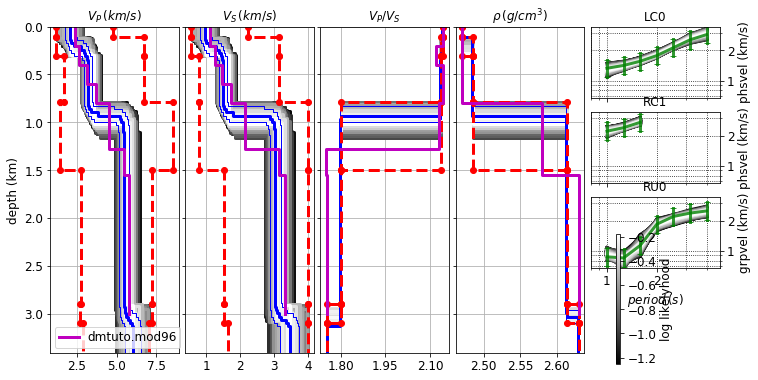

In [22]:
#display the best 100 models found and their image in the dataspace
#compute the median and std of the resulting population at each depth (blue)
#display
%run -i ../bin/HerrMet \
        --disp 1000 \
            -best \
            -range \
            -inline \
            -m96 dmtuto.mod96

> red dashed curves = prior boundaries  
> green duspersion curves = target data  
> gray models = best models sorted by increaseing likelyhood  
> gray dispersion curves = corresponding data  
> blue lines = median (thick), 16% 84% percentiles (thin) computed from the best models displayed  
> purple model = actual model used to generate the synthetic data  
